In [1]:
# Question 1  Naive Bayes Classifier

import matplotlib.pyplot as plt
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import MinMaxScaler

with open('C:/Users/Chandan/Documents/CPTS 570/Homework/HW 3/fortunecookiedata/traindata.txt', 'r') as f:
    Train_x = f.readlines()
with open('C:/Users/Chandan/Documents/CPTS 570/Homework/HW 3/fortunecookiedata/trainlabels.txt', 'r') as f:
    Train_y = f.readlines()
with open('C:/Users/Chandan/Documents/CPTS 570/Homework/HW 3/fortunecookiedata/stoplist.txt', 'r') as f:
    Stop = f.readlines() 

ss = []
for i in range(len(Stop)):
    ss.append(Stop[i].rstrip()) #Striping the \n character
    
voc = []
for i in range(len(Train_x)):
    x = Train_x[i]
    for word in x.split():
        if word not in ss:
            voc.append(word)        #creating the vocabulary
    
voc.sort()
voc_sort = list(dict.fromkeys(voc))    #alphabetically sorted unique vocabulary


# Feature matrix of Training samples
X_train = np.zeros((len(Train_x), len(voc_sort)))
for i in range(len(Train_x)):
    x = Train_x[i]
    for j in range(len(voc_sort)):
        if x.find(voc_sort[j]) + 1:           
            X_train[(i,j)] =  1

Y_train = []
for i in range(len(Train_y)):
    Y_train.append(Train_y[i].rstrip()) #Striping the \n character
      
# Feature matrix of Test samples
with open('C:/Users/Chandan/Documents/CPTS 570/Homework/HW 3/fortunecookiedata/testdata.txt', 'r') as f:
    Test_x = f.readlines()
with open('C:/Users/Chandan/Documents/CPTS 570/Homework/HW 3/fortunecookiedata/testlabels.txt', 'r') as f:
    Test_y = f.readlines()
    
        

X_test = np.zeros((len(Test_x), len(voc_sort)))
for i in range(len(Test_x)):
    x = Test_x[i]
    for j in range(len(voc_sort)):
        if x.find(voc_sort[j]) + 1:           
            X_test[(i,j)] =  1   

    
Y_test = []
for i in range(len(Test_y)):
    Y_test.append(Test_y[i].rstrip()) #Striping the \n character
    
scaling = MinMaxScaler(feature_range=(-1,1)).fit(X_train)
X_train = scaling.transform(X_train)
X_test = scaling.transform(X_test)
    
##################################################Scikit Function######################################   
    
gnb = GaussianNB()
GnBTraining_acc = []
GnBTest_acc = []


count = 0
for i in range(len(X_train)):
    y = gnb.fit(X_train,Y_train).predict([X_train[i,:]])                  # Laplace Smoothing by default
    if y != Y_train[i]:
        count = count + 1 
GnBTraining_acc.append((len(X_train)-count)/len(X_train)*100)

    
count = 0
for i in range(len(X_test)):
    y = gnb.fit(X_train,Y_train).predict([X_test[i,:]])                   # Laplace Smoothing by default
    if y != Y_test[i]:
        count = count + 1 
GnBTest_acc.append((len(X_test)-count)/len(X_test)*100)

print('Scikit GnB Training accuracy is:', GnBTraining_acc,'%' )
print('Scikit GnB Test accuracy is:', GnBTest_acc ,'%' )

Scikit GnB Training accuracy is: [96.58385093167702] %
Scikit GnB Test accuracy is: [64.35643564356435] %


In [3]:
#############################################Defining Naive Bayes Classifier###################################

c1 = 0
for i in range(len(Y_train)):
    if int(Y_train[i]) == 1:
        c1 = c1 + 1
P1 = c1/len(Y_train)

Training_acc = []
Test_acc = []

error = 0
for i in range(len(X_train)):
    x = X_train[i,:]
    mult1 = 1
    mult0 = 1
    for ii in range(len(voc_sort)):
        count = 0
        for iii in range(len(Y_train)):
            if int(Y_train[iii]) == 1:
                if X_train[iii,ii] == x[ii]:
                    count = count + 1
        # for all y = 1, #count times input feature ii takes that value
        Px_i1 = (count/c1)          
        mult1 = mult1*Px_i1               # independent events
        mult0 = mult0*(1 - Px_i1)
            
            
        
    P1 = ((P1*mult1)+1)/(((1-P1)*mult0) + (P1*mult1)+2) #Bayes rule with Laplace smooting
    P0 = 1 - P1
    y_pred = 0
    if P1 > P0:
        y_pred = 1
    if y_pred != int(Y_train[i]):
        error = error + 1
        
Training_acc.append((len(X_train)-error)/len(X_train)*100)

error = 0
for i in range(len(X_test)):
    x = X_test[i,:]
    mult1 = 1
    mult0 = 1
    for ii in range(len(voc_sort)):
        count = 0
        for iii in range(len(Y_train)):
            if int(Y_train[iii]) == 1:
                if X_train[iii,ii] == x[ii]:
                    count = count + 1
        # for all y = 1, #count times input feature ii takes that value
        Px_i1 = (count/c1)          
        mult1 = mult1*Px_i1                   # Independent events
        mult0 = mult0*(1 - Px_i1)
            
            
        
    P1 = ((P1*mult1 + 1))/(((1-P1)*mult0) + (P1*mult1)+2) #Bayes rule with Laplace smoothing
    P0 = 1 - P1
    y_pred = 0
    if P1 > P0:
        y_pred = 1
    if y_pred != int(Y_test[i]):
        error = error + 1
        
Test_acc.append((len(X_test)-error)/len(X_test)*100)

print('Training accuracy is:', Training_acc,'%' )
print('Test accuracy is:', Test_acc ,'%' )

Training accuracy is: [93.7888198757764] %
Test accuracy is: [61.386138613861384] %


In [4]:
# Q2 CNN on FashionMNIST
import matplotlib.pyplot as plt
from torch import tensor
import torch
import matplotlib as mpl
import pandas as pd
import torch.nn as nn
import torch.nn.functional as F
from torch import optim


# Data label creation
def get_data():
    train_data = pd.read_csv('C:/Users/Chandan/Documents/CPTS 570/Homework/HW 2/data/fashion-mnist_train.csv')
    test_data = pd.read_csv('C:/Users/Chandan/Documents/CPTS 570/Homework/HW 2/data/fashion-mnist_test.csv')
    x_train = train_data[train_data.columns[1:]].values
    y_train = train_data.label.values
    x_test = test_data[test_data.columns[1:]].values
    y_test = test_data.label.values
    return map(tensor, (x_train, y_train, x_test, y_test)) # maps are useful functions to know
                                                           # here, we are just converting lists to pytorch tensors
    
    
x_train, y_train, x_test, y_test = get_data()
train_n, train_m = x_train.shape
test_n, test_m = x_test.shape
n_cls = y_train.max()+1

### Normalization
x_train, x_test = x_train.float(), x_test.float()
train_mean,train_std = x_train.mean(),x_train.std()
train_mean,train_std
def normalize(x, m, s): return (x-m)/s
x_train = normalize(x_train, train_mean, train_std)
x_test = normalize(x_test, train_mean, train_std) # note this normalize test data also with training mean and standard deviation




# Definition of the model
class FashionMnistNet(nn.Module):
    # Based on Lecunn's Lenet architecture
    def __init__(self):
        super(FashionMnistNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 8, 5, stride = 2, padding = 2)   # creating layers
        self.conv2 = nn.Conv2d(8, 16, 3, stride = 2, padding = 1)
        self.conv3 = nn.Conv2d(16, 32, 3, stride = 2, padding = 1)
        self.conv4 = nn.Conv2d(32, 32, 3, stride = 2, padding = 1)
        self.fc1 = nn.Linear(32, 10)
        #self.avg = nn.AdaptiveAvgPool2d(1)
        
    def forward(self, x):
        x = F.relu(self.conv1(x))     #Relu function layer then the max layer (operation)
        x = F.relu(self.conv2(x))
        x = F.relu(self.conv3(x))
        x = F.relu(self.conv4(x))
        pool = nn.AdaptiveAvgPool2d(1)
        x = pool(x)
        x = x.view(-1, self.num_flat_features(x))
        x = self.fc1(x)
        return x
    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features
    
# instantiating the model
model = FashionMnistNet()
print(model)

FashionMnistNet(
  (conv1): Conv2d(1, 8, kernel_size=(5, 5), stride=(2, 2), padding=(2, 2))
  (conv2): Conv2d(8, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (conv3): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (conv4): Conv2d(32, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (fc1): Linear(in_features=32, out_features=10, bias=True)
)


loss:  2.2892117500305176
loss:  2.307591199874878
loss:  2.320528507232666
loss:  2.299743890762329
loss:  2.3046722412109375
loss:  2.298807144165039
loss:  2.298743486404419
loss:  2.316011428833008
loss:  2.2976181507110596
loss:  2.3065874576568604
loss:  2.3050763607025146
loss:  2.3143815994262695
loss:  2.273710250854492
loss:  2.288867950439453
loss:  2.2811737060546875
loss:  2.292522430419922
loss:  2.316950798034668
loss:  2.315214157104492
loss:  2.2948451042175293
loss:  2.290846347808838
loss:  2.2995474338531494
loss:  2.304556369781494
loss:  2.309980869293213
loss:  2.313950300216675
loss:  2.298236846923828
loss:  2.302234411239624
loss:  2.285597324371338
loss:  2.3011090755462646
loss:  2.297877788543701
loss:  2.3077023029327393
loss:  2.3087480068206787
loss:  2.3158981800079346
loss:  2.3074653148651123
loss:  2.293834686279297
loss:  2.2899649143218994
loss:  2.3007595539093018
loss:  2.3180384635925293
loss:  2.3262977600097656
loss:  2.29496169090271
loss:  2

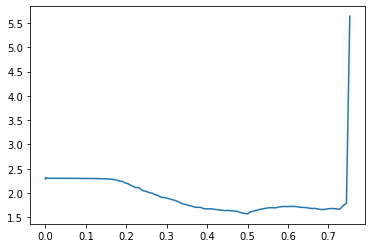

In [5]:
# Optimal Learning rate

import math
def find_lr(net, loss_func, init_value = 1e-8, final_value=10., beta = 0.98, bs = 32):
    num = (train_n-1)//bs + 1 # num of batches 
    mult = (final_value/init_value) ** (1/num)
    lr = init_value
    optimizer = optim.SGD(net.parameters(), lr=lr)
    avg_loss = 0.
    best_loss = 0.
    batch_num = 0.
    losses = []
    log_lrs = []
    for i in range((train_n-1)//bs + 1):
        batch_num += 1
        start_i = i*bs
        end_i = start_i+bs
        xb = x_train[start_i:end_i].reshape(bs, 1, 28, 28)
        yb = y_train[start_i:end_i]
        optimizer.zero_grad()
        outputs = net.forward(xb)
        loss = loss_func(outputs, yb)
        
        #Compute the smoothed loss
        print("loss: ", loss.item())
        avg_loss = beta * avg_loss + (1-beta) *loss.item()
        smoothed_loss = avg_loss / (1 - beta**batch_num)
        
        #Stop if the loss is exploding
        if batch_num > 1 and smoothed_loss > 4 * best_loss:
            return log_lrs, losses
        
        #Record the best loss
        if smoothed_loss < best_loss or batch_num==1:
            best_loss = smoothed_loss
            
        #Store the values
        losses.append(smoothed_loss)
        log_lrs.append(math.log10(lr))
        
        #Do the SGD step
        loss.backward()
        optimizer.step()
        
        #Update the lr for the next step
        lr *= mult
        optimizer.param_groups[0]['lr'] = lr
        
    return log_lrs, losses

model_lrfinder = FashionMnistNet()
bs = 32
loss_func = F.cross_entropy
log_lrs, losses = find_lr(model_lrfinder, loss_func)

plt.plot([10**x for x in log_lrs], losses)

Accuracy:  81.08999633789062
Accuracy:  86.37999725341797
Accuracy:  86.88999938964844
Accuracy:  87.94999694824219
Accuracy:  88.05999755859375
Accuracy:  88.52999877929688
Accuracy:  88.58999633789062
Accuracy:  88.01000213623047
Accuracy:  88.9000015258789
Accuracy:  88.58999633789062


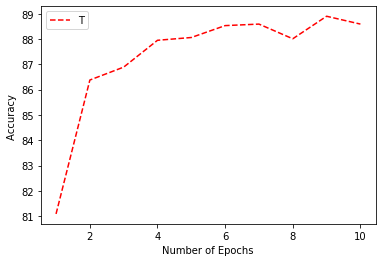

In [6]:
model_wnd = FashionMnistNet()
lr = 0.5 # learning rate
epochs = 10 # number of epochs
bs = 100
loss_func = F.cross_entropy
opt = optim.SGD(model_wnd.parameters(), lr=lr)
accuracy_vals_wnd = []
for epoch in range(epochs):
    model_wnd.train()
    for i in range((train_n-1)//bs + 1):
        start_i = i*bs
        end_i = start_i+bs
        xb = x_train[start_i:end_i].reshape(bs, 1, 28, 28)
        yb = y_train[start_i:end_i]
        loss = loss_func(model_wnd.forward(xb), yb)
        loss.backward()
        opt.step()
        opt.zero_grad()
        
    model_wnd.eval()
    with torch.no_grad():
        total_loss, accuracy = 0., 0.
        validation_size = int(test_n/10)
        for i in range(test_n):
            x = x_test[i].reshape(1, 1, 28, 28)
            y = y_test[i]
            pred = model_wnd.forward(x)
            accuracy += (torch.argmax(pred) == y).float()
        print("Accuracy: ", (accuracy*100/test_n).item())
        accuracy_vals_wnd.append((accuracy*100/test_n).item())
        
    
        
axis = (1 , 2 , 3 , 4, 5, 6, 7, 8, 9, 10)
plt.plot(axis,accuracy_vals_wnd , 'r--')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy ')
plt.legend(('Test Accuracy'))
plt.show()

Accuracy:  45.00833511352539
Accuracy:  83.17833709716797
Accuracy:  84.83833312988281
Accuracy:  86.36833190917969
Accuracy:  86.5816650390625
Accuracy:  87.07666778564453
Accuracy:  87.44666290283203
Accuracy:  87.9800033569336
Accuracy:  88.38833618164062
Accuracy:  88.78333282470703


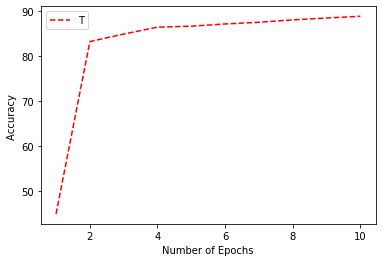

In [7]:
model_wnd = FashionMnistNet()
lr = 0.5 # learning rate
epochs = 10 # number of epochs
bs = 100  # Batches
loss_func = F.cross_entropy
opt = optim.SGD(model_wnd.parameters(), lr=lr)
accuracy_vals_wnd1 = []
for epoch in range(epochs):
    model_wnd.train()
    for i in range((train_n-1)//bs + 1):    #training in 1bs batches
        start_i = i*bs
        end_i = start_i+bs
        xb = x_train[start_i:end_i].reshape(bs, 1, 28, 28)
        yb = y_train[start_i:end_i]
        loss = loss_func(model_wnd.forward(xb), yb)
        loss.backward()
        opt.step()
        opt.zero_grad()
        
    model_wnd.eval()
    with torch.no_grad():
        total_loss, accuracy = 0., 0.
        validation_size = int(train_n/10)
        for i in range(train_n):
            x = x_train[i].reshape(1, 1, 28, 28)
            y = y_train[i]
            pred = model_wnd.forward(x)
            accuracy += (torch.argmax(pred) == y).float()
        print("Accuracy: ", (accuracy*100/train_n).item())
        accuracy_vals_wnd1.append((accuracy*100/train_n).item())
        
    
        
axis = (1 , 2 , 3 , 4, 5, 6, 7, 8, 9, 10)
plt.plot(axis,accuracy_vals_wnd1 , 'r--')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy ')
plt.legend(('Train Accuracy'))
plt.show()

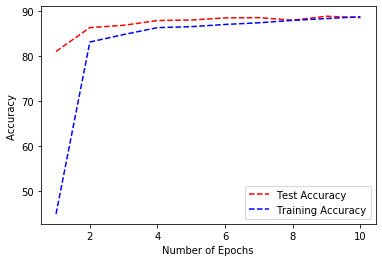

In [8]:
plt.plot(axis,accuracy_vals_wnd , 'r--',axis,accuracy_vals_wnd1 , 'b--')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy ')
plt.legend(('Test Accuracy','Training Accuracy'))
plt.show()